In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
import os
print (os.getcwd())

C:\Users\agkal\Desktop\NLP_Project\covidPakistan


In [3]:
os.chdir('C:\\Users\\agkal\\Desktop\\NLP_Project\\covidPakistan\\Pakistan Dataset\\dataset\\8th-april-2020')

df = pd.read_csv('Sindh.csv' ,parse_dates=['Date'])
df.rename(columns={'Province/Region':'Region'}, inplace=True)
print(df.head())
print(df.tail())

        Date Region  Confirmed  Deaths  Recovered
0 2020-03-10  Sindh       14.0     0.0        1.0
1 2020-03-11  Sindh       14.0     0.0        2.0
2 2020-03-12  Sindh       15.0     0.0        2.0
3 2020-03-13  Sindh       16.0     0.0        3.0
4 2020-03-14  Sindh       18.0     0.0        3.0
         Date Region  Confirmed  Deaths  Recovered
64 2020-05-13  Sindh    13341.0   234.0     2835.0
65 2020-05-14  Sindh    14099.0   243.0     3075.0
66 2020-05-15  Sindh    14916.0   255.0     3606.0
67 2020-05-16  Sindh    15590.0   268.0     3804.0
68        NaT    NaN        NaN     NaN        NaN


In [4]:
df_date = df.groupby(['Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df_region = df.groupby(['Region'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
print(df_date.tail())


         Date  Confirmed  Deaths  Recovered
63 2020-05-12    12610.0   218.0     2229.0
64 2020-05-13    13341.0   234.0     2835.0
65 2020-05-14    14099.0   243.0     3075.0
66 2020-05-15    14916.0   255.0     3606.0
67 2020-05-16    15590.0   268.0     3804.0


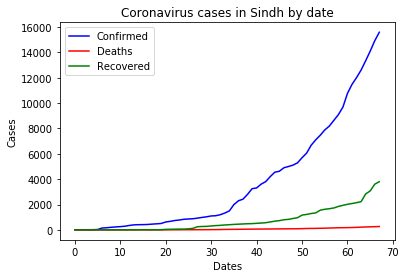

In [5]:
date_x_ticks = []
country_x_ticks = []
date_confirmed=[]
date_deaths=[]
date_recovered=[]
country_confirmed = []
country_deaths = []
country_recovered = []

for index, row in df_date.iterrows():
    date_x_ticks.append(row['Date'])
    date_confirmed.append(row['Confirmed'])
    date_deaths.append(row['Deaths'])
    date_recovered.append(row['Recovered'])

for index, row in df_region.iterrows():
    country_x_ticks.append(row['Region'])
    country_confirmed.append(row['Confirmed'])
    country_deaths.append(row['Deaths'])
    country_recovered.append(row['Recovered'])


#plt.xticks(np.arange(len(date_x_ticks)), date_x_ticks)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_confirmed, label='Confirmed', color='blue')
plt.plot(date_deaths, label='Deaths', color='red')
plt.plot(date_recovered, label='Recovered', color='green')
plt.title("Coronavirus cases in Sindh by date")
plt.legend()
plt.show()


In [6]:
#-------------------------------------------ARIMA Model---------------------------------------------------------
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

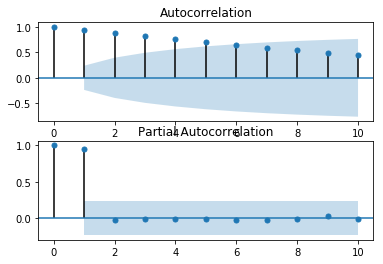

C:\Users\agkal\Anaconda2\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\agkal\Anaconda2\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\agkal\Anaconda2\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

In [7]:
date_confirmed = df_date[['Date', 'Confirmed']]
date_death = df_date[['Date', 'Deaths']]
date_recovered = df_date[['Date', 'Recovered']]

fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(date_confirmed['Confirmed'], lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(date_confirmed['Confirmed'], lags=10, ax=ax2)
plt.show()
for index, row in date_confirmed.iterrows():
    if row['Confirmed'] is None:
        row['Confirmed'] = 0.0

for index, row in date_death.iterrows():
    if row['Deaths'] is None:
        row['Deaths'] = 0.0

for index, row in date_recovered.iterrows():
    if row['Recovered'] is None:
        row['Recovered'] = 0.0




model_ma_confirmed = ARIMA(np.asanyarray(date_confirmed['Confirmed']),  order=(2,0,0))
model_fit_ma_confirmed = model_ma_confirmed.fit(disp=False)
predict_ma_confirmed = model_fit_ma_confirmed.predict(1, len(date_confirmed)+13)
#print(predict_ma_confirmed)


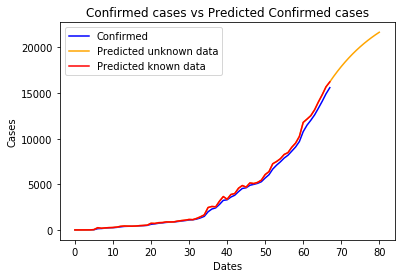

In [8]:
#plt.gca().xaxis.set_major_formatter(mdates.AutoDateFormatter('%m/%d'))
#plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xlabel('Dates')
plt.ylabel('Cases')
#plt.xticks(np.arange(len(date_x_ticks)), date_x_ticks, rotation=90)
plt.plot(date_confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(predict_ma_confirmed, label='Predicted unknown data', color='orange')
plt.plot(predict_ma_confirmed[:len(predict_ma_confirmed)-13], label='Predicted known data', color='red')
plt.title('Confirmed cases vs Predicted Confirmed cases')
plt.legend()
plt.show()


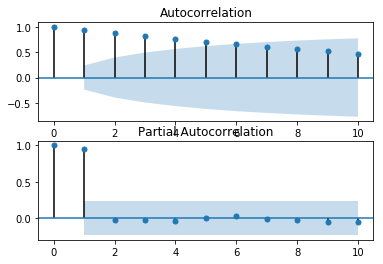

In [9]:
fig = plt.figure()

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(date_death['Deaths'], lags=10, ax=ax1) #
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(date_death['Deaths'], lags=10, ax=ax2)#
plt.show()

C:\Users\agkal\Anaconda2\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\agkal\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


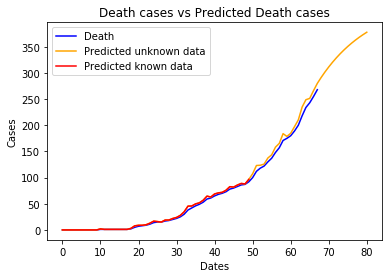

In [10]:
model_ma_death = ARIMA(np.asanyarray(date_death['Deaths']),  order=(2, 0, 0))
model_fit_ma_death = model_ma_death.fit(disp=False)
predict_ma_death = model_fit_ma_death.predict(1, len(date_death) + 13)
#print(predict_ma_death)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_death['Deaths'], label='Death', color='blue')
plt.plot(predict_ma_death, label='Predicted unknown data', color='orange')
plt.plot(predict_ma_death[:len(predict_ma_death)-31], label='Predicted known data', color='red')
plt.title('Death cases vs Predicted Death cases')
plt.legend()
plt.show()

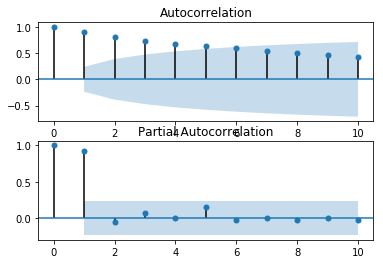

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(date_recovered['Recovered'], lags=10, ax=ax1) #
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(date_recovered['Recovered'], lags=10, ax=ax2)#
plt.show()


C:\Users\agkal\Anaconda2\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\agkal\Anaconda2\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


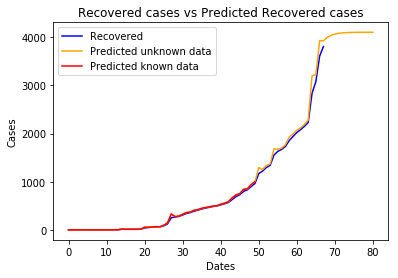

In [12]:

model_ma_recovered = ARIMA(np.asanyarray(date_recovered['Recovered']),  order=(2,0, 0))
model_fit_ma_recovered = model_ma_recovered.fit(disp=False)
predict_ma_recovered = model_fit_ma_recovered.predict(1, len(date_recovered) + 13)
#print(predict_ma_recovered)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_recovered['Recovered'], label='Recovered', color='blue')
plt.plot(predict_ma_recovered, label='Predicted unknown data', color='orange')
plt.plot(predict_ma_recovered[:len(predict_ma_recovered)-31], label='Predicted known data', color='red')
plt.title('Recovered cases vs Predicted Recovered cases')
plt.legend()
plt.show()

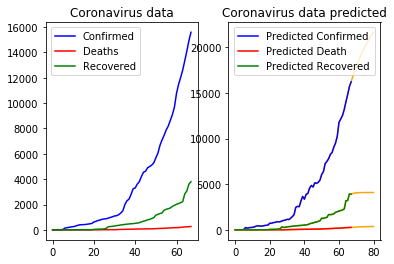

In [14]:

plt.subplot(121)
plt.title("Coronavirus data")
plt.plot(date_confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(date_death['Deaths'], label='Deaths', color='red')
plt.plot(date_recovered['Recovered'], label='Recovered', color='green')
plt.legend()
plt.subplot(122)
#plt.xticks(np.arange(len(date_x_ticks)), date_x_ticks, rotation=90)
plt.title("Coronavirus data predicted")
plt.plot(predict_ma_confirmed, color='orange')
plt.plot(predict_ma_confirmed[:len(predict_ma_confirmed)-13], label='Predicted Confirmed ', color='blue')
plt.plot(predict_ma_death, color = 'orange')
plt.plot(predict_ma_death[:len(predict_ma_death)-13], label='Predicted Death', color = 'red')
plt.plot(predict_ma_recovered,  color = 'orange')
plt.plot(predict_ma_recovered[:len(predict_ma_recovered)-13], label='Predicted Recovered', color = 'green')
plt.legend()
plt.show()


# SARIMAX based prediction


In [15]:
#--------------------------------------------------------SARIMAX Model----------------------------------------------------------------
date_confirmed = df_date[['Date', 'Confirmed']]
date_death = df_date[['Date', 'Deaths']]
date_recovered = df_date[['Date', 'Recovered']]

for index, row in date_confirmed.iterrows():
    if row['Confirmed'] is None:
        row['Confirmed'] = 0.0
for index, row in date_death.iterrows():
    if row['Deaths'] is None:
        row['Deaths'] = 0.0

for index, row in date_recovered.iterrows():
    if row['Recovered'] is None:
        row['Recovered'] = 0.0


from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima_confirmed = SARIMAX(np.asanyarray(date_confirmed['Confirmed']),  order=(2,1,0), seasonal_order=(1,1,0,12))
model_fit_sarima_confirmed = model_sarima_confirmed.fit(disp=False, enforce_stationarity=False)


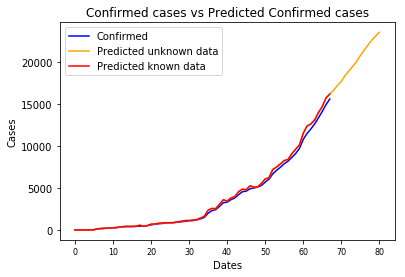

In [16]:
#-----prediction -----------------------------------------
predict_sarima_confirmed = model_fit_sarima_confirmed.predict(1, len(date_confirmed)+13)
#print(predict_sarima_confirmed)
plt.xlabel('Dates')
plt.ylabel('Cases')


plt.tick_params(axis='x', which='major', labelsize=8)
plt.legend(loc='best')


#plt.xticks(np.arange(len(date_x_ticks)), date_x_ticks)
plt.plot(date_confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(predict_sarima_confirmed, label='Predicted unknown data', color='orange')
plt.plot(predict_sarima_confirmed[:len(predict_sarima_confirmed)-13], label='Predicted known data', color='red')
plt.title('Confirmed cases vs Predicted Confirmed cases')
plt.legend()
plt.show()


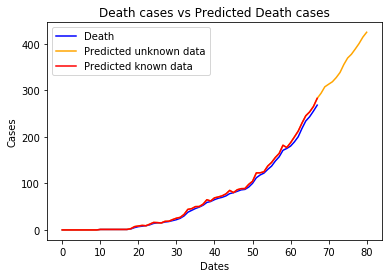

In [17]:
model_sarima_death = SARIMAX(np.asanyarray(date_death['Deaths']),  order=(1,1,0), seasonal_order=(1,1,0,12))
model_fit_sarima_death = model_sarima_death.fit(disp=False, enforce_stationarity=False)
predict_sarima_death = model_fit_sarima_death.predict(1, len(date_death)+13)
#print(predict_sarima_death)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_death['Deaths'], label='Death', color='blue')
plt.plot(predict_sarima_death, label='Predicted unknown data', color='orange')
plt.plot(predict_sarima_death[:len(predict_sarima_death)-13], label='Predicted known data', color='red')
plt.title('Death cases vs Predicted Death cases')
plt.legend()
plt.show()



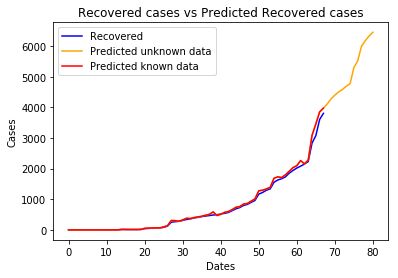

In [18]:

model_sarima_recovered = SARIMAX(np.asanyarray(date_recovered['Recovered']),  order=(2,1,0), seasonal_order=(1,1,0,12))
model_fit_sarima_recovered = model_sarima_recovered.fit(disp=False, enforce_stationarity=False)
predict_sarima_recovered = model_fit_sarima_recovered.predict(1, len(date_recovered)+13)
#print(predict_sarima_recovered)
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.plot(date_recovered['Recovered'], label='Recovered', color='blue')
plt.plot(predict_sarima_recovered, label='Predicted unknown data', color='orange')
plt.plot(predict_sarima_recovered[:len(predict_sarima_recovered)-13], label='Predicted known data', color='red')
plt.title('Recovered cases vs Predicted Recovered cases')
plt.legend()
plt.show()

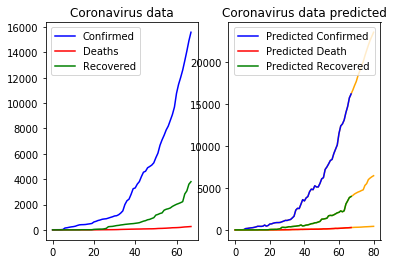

In [19]:
plt.subplot(121)
plt.title("Coronavirus data")
plt.plot(date_confirmed['Confirmed'], label='Confirmed', color='blue')
plt.plot(date_death['Deaths'], label='Deaths', color='red')
plt.plot(date_recovered['Recovered'], label='Recovered', color='green')
plt.legend()
plt.subplot(122)
plt.title("Coronavirus data predicted")
plt.plot(predict_sarima_confirmed, color='orange')
plt.plot(predict_sarima_confirmed[:len(predict_sarima_confirmed)-13], label='Predicted Confirmed ', color='blue')
plt.plot(predict_sarima_death, color = 'orange')
plt.plot(predict_sarima_death[:len(predict_sarima_death)-13], label='Predicted Death', color = 'red')
plt.plot(predict_sarima_recovered,  color = 'orange')
plt.plot(predict_sarima_recovered[:len(predict_sarima_recovered)-13], label='Predicted Recovered', color = 'green')
plt.legend()
plt.show()


In [20]:
import scipy.stats as stats
spearman_sarima_confirmed = stats.spearmanr(date_confirmed['Confirmed'], predict_sarima_confirmed[:len(predict_sarima_confirmed)-13])[0]
print("SPEARMAN CONFIRMED SARIMA: ", spearman_sarima_confirmed)

('SPEARMAN CONFIRMED SARIMA: ', 0.9994560394397108)


# Similiarity analysis using Glove method

In [1]:
ss1 = 'The president greets the press in Lahore'
ss2 = 'Alvi speaks to the media in Punjab'

#### Count Vectorizer method

In [2]:
def cosine_distance_countvectorizer_method(s1, s2):
    
    # sentences to list
    allsentences = [s1 , s2]
    
    # packages
    from sklearn.feature_extraction.text import CountVectorizer
    from scipy.spatial import distance
    
    # text to vector
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    print('Similarity of two sentences are equal to ',round((1-cosine)*100,2),'%')
    return cosine

In [3]:
cosine_distance_countvectorizer_method(ss1 , ss2)

('Similarity of two sentences are equal to ', 37.8, '%')


0.6220355269907728

#### Glove Embedding

In [5]:
gloveFile = "data\\glove.6B.50d.txt"
import numpy as np
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    with open(gloveFile) as f:
        content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

import re
from nltk.corpus import stopwords
import pandas as pd

def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

def cosine_distance_between_two_words(word1, word2):
    import scipy
    return (1- scipy.spatial.distance.cosine(model[word1], model[word2]))

def calculate_heat_matrix_for_two_sentences(s1,s2):
    s1 = preprocess(s1)
    s2 = preprocess(s2)
    result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1
    return result_df

def cosine_distance_wordembedding_method(s1, s2):
    import scipy
    vector_1 = np.mean([model[word] for word in preprocess(s1)],axis=0)
    vector_2 = np.mean([model[word] for word in preprocess(s2)],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('Word Embedding method with a cosine distance asses that our two sentences are similar to',round((1-cosine)*100,2),'%')

def heat_map_matrix_between_two_sentences(s1,s2):
    df = calculate_heat_matrix_for_two_sentences(s1,s2)
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax_blue = sns.heatmap(df, cmap="YlGnBu")
    # ax_red = sns.heatmap(df)
    print(cosine_distance_wordembedding_method(s1, s2))
    return ax_blue

In [6]:
ss1 = 'The president greets the press in Lahore'
ss2 = 'Alvi speaks to the media in Punjab'

model = loadGloveModel(gloveFile)
heat_map_matrix_between_two_sentences(ss1,ss2)

Loading Glove Model
('Done.', 400000, ' words loaded!')
('Word Embedding method with a cosine distance asses that our two sentences are similar to', 65.73, '%')
None
